In [ ]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt


To execute just one cell, we press the ```Run``` button or click on Cell Run or press the keys ```Ctrl + Enter``` . While execution is underway, the header of the cell shows the * mark:

While a cell is being executed, no other cell can be executed. If you try to execute another cell, its execution will not start until the first cell has finished its execution.

Once the execution is finished, the header of the cell will be replaced by the next number of execution. Since this will be the first cell executed, the number shown will be 1. If the process of importing the libraries is correct, no output cell is produced.

### The DataFrame Data Structure

The key data structure in Pandas is the ```DataFrame``` object. A ```DataFrame``` is basically a tabular data structure, with ```rows``` and ```columns```. 

Rows have a specific index to access them, which can be any name or value. 

In Pandas, the ```columns``` are called ```Series```, a special type of data, which in  essence consists of a list of several values, where
each value has an ```index```. 

```DataFrame``` data structure can be seen as a spreadsheet, but it is much more flexible. To understand how it works, let us see
how to create a ```DataFrame``` from a common Python ```dictionary of lists```.



### Let's begin

Let us begin by importing those toolboxes that we will need for our program. In the first cell we put the code to import the Pandas library as pd. This is for convenience; every time we need to use some functionality from the Pandas library, we will write ```pd``` instead of ```pandas```. We will also import the two core libraries mentioned above:
the ```numpy``` library as ```np``` and the ```matplotlib``` library as ```plt```.

In [ ]:
# Syntax of dictionary

dictionary = {'apple': 'red', 'banana':'yellow', 'grape':'purple'}

In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt



data = {'year': [
2010, 2011, 2012,
2010, 2011, 2012,
2010, 2011, 2012
] ,
'team': [
'FCBarcelona', 'FCBarcelona',
'FCBarcelona', 'RMadrid',
'RMadrid', 'RMadrid',
'ValenciaCF', 'ValenciaCF',
'ValenciaCF'
] ,
'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
'draws': [6, 7, 4, 5, 4, 7, 8, 10, 8],
'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
}
football = pd.DataFrame(data , columns = [
'year', 'team', 'wins', 'draws', 'losses'
]
)

In [4]:
!pip install matplotlib

In [10]:
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In this example, we use the pandas ```DataFrame``` object constructor with a dictionary of lists as argument. The value of each entry in the dictionary is the name of the ```column```, and the ```lists``` are their ```values```.

The ```DataFrame``` columns can be arranged at construction time by entering a keyword columns with a list of the names of the columns ordered as we want. 

### Open Government Data Analysis Example Using Pandas

Let us start reading the data we downloaded from http://ec.europa.eu/eurostat/data/database. After
ensuring that the educ_figdp_1_Data.csv file is stored in the same directory as our notebook directory, we will write the following code to read and show the content. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


edu = pd.read_csv('educ_figdp_1_Data.csv',
na_values = ':',
usecols = ["TIME","GEO","Value"])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


The way to read CSV (or any other separated value, providing the separator character) files in Pandas is by calling the ```read_csv``` method.

Besides the name of the file, we add the ```na_values``` key argument to this method along with the character that represents ```“non available data”``` in the file. 

Normally, CSV files have a header with the names of the columns. If this is the case, we can use the ```usecols``` parameter to select which columns in the file will be used.

Beside this, Pandas also has functions for reading files with formats such as ```Excel```, ```HDF5```, tabulated files, or even the content from the clipboard (```read_excel()```, ```read_hdf()```, ```read_table()```, ```read_clipboard()```). Whichever function
we use, the result of reading a file is stored as a ```DataFrame``` structure.

In [16]:
# Show the first 5 rows
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [17]:
# Show the last 5 rows
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [18]:
# Show quick statistical information on all the numeric columns
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


### Selecting Data
If we want to select a subset of data from a DataFrame, it is necessary to indicate this subset using square brackets (```[ ]```) after the ```DataFrame```. The subset can be specified in several ways. If we want to select only one column from a ```DataFrame```, we only need to put its name between the square brackets. The result will be a ```Series``` data
structure, not a ```DataFrame```, because only one column is retrieved.

In [20]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

If we want to select a subset of rows from a ```DataFrame```, we can do so by indicating a range of rows separated by a colon ```(:)``` inside the square brackets. This is commonly known as a ```slice of rows```:

In [21]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


This instruction returns the slice of rows from the 10th to the 13th position. Note that the slice does not use the index labels as references, but the position. In this case, the labels of the rows simply coincide with the position of the rows.

If we want to select a subset of columns and rows using the labels as our references instead of the positions, we can use ```loc``` indexing:

In [3]:
edu.loc[90:94, ['TIME','GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


### Filtering Data
Another way to select a subset of data is by applying Boolean indexing. This indexing is commonly known as a **filter**. For instance, if we want to filter those values ```less than``` or ```equal``` to ```6.5```, we can do it like this:

In [32]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


### Filtering Missing Values
Pandas uses the special value ```NaN``` (not a number) to represent missing values. In Python, ```NaN``` is a special floating-point value returned by certain operations when one of their results ends in an undefined value. 

A subtle feature of ```NaN``` values is that two ```NaN``` are never equal. Because of this, the only safe way to tell whether a value is
missing in a ```DataFrame``` is by using the ```isnull()``` function. 

Indeed, this function can be used to filter rows with missing values:




In [33]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


### Manipulating Data
Once we know how to select the desired data, the next thing we need to know is how to manipulate data. One of the most straightforward things we can do is to operate with columns or rows using aggregation functions. 

#### List of most common aggregation functions

- ```count()``` Number of non-null observations
- ```sum()``` Sum of values
- ```mean()``` Mean of values
- ```median()``` Arithmetic median of values
- ```min()``` Minimum
- ```max()``` Maximum
- ```prod()``` Product of values
- ```std()``` Unbiased standard deviation
- ```var()``` Unbiased variance

The result of all these functions applied to a row or
column is always a number. 

Meanwhile, if a function is applied to a DataFrame or a
selection of rows and columns, then you can specify if the function should be applied to the rows for each column (setting the ```axis=0``` keyword on the invocation of the function), or it should be applied on the columns for each row (setting the ```axis=1``` keyword on the invocation of the function).

In [36]:
edu. max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [40]:
# Pandas and Python difference

print("Pandas max function:", edu['Value']. max())
print("Python max function:", max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


In [60]:
# apply operations over all the values in rows, columns or a selection of both

s = edu["Value" ]/100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [61]:
# we can apply any function to a DataFrame or Series 
# just setting its name as argument of the apply method

s = edu['Value']. apply (np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [62]:
# Sample lambda function
s = edu['Value']. apply ( lambda d: d**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [63]:
# Set new values in DataFrame
edu['ValueNorm'] = edu['Value']/edu['Value']. max ()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2000,a,5.00,0.567537


Now, if we want to remove this column from the ```DataFrame```, we can use the ```drop``` function; this removes the indicated rows if ```axis=0```, or the indicated columns if ```axis=1```.

In ```Pandas```, all the functions that change the contents of a ```DataFrame```, such as the ```drop``` function, will normally return a copy of the modified data, instead of overwriting the ```DataFrame```. 
Therefore, the original ```DataFrame is kept```. 

If you do not want to keep the old values, you can set the keyword ```inplace``` to True. By default, this keyword is set to ```False```, meaning that a copy of the data is returned.

In [64]:
edu.drop('ValueNorm', axis = 1, inplace = True)
edu.head()


,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


If what we want to do is to insert a new row at the bottom of the ```DataFrame```, we can use the Pandas ```append``` function.

This function receives as argument the new row, which is represented as a dictionary where the keys are the name of the columns and the values are the associated value. 

You must be aware to setting the ```ignore_index``` flag in the append method to ```True```, otherwise the ```index 0``` is given to this new row, which will produce an error if it already exists:

In [4]:
edu = edu.append({"TIME": 2000,"Value": 5.00,"GEO": 'a'} ,
ignore_index = True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


In [66]:
# Removing the row

edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2000,a,5.00


In [69]:
# Remove missing values

eduDrop = edu.dropna(how = 'any', subset = ["Value"])
eduDrop. head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [71]:
# Fill missing value

eduFilled = edu. fillna(value = {"Value": 0})
eduFilled. head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


### Sorting
Another important functionality we will need when inspecting our data is to sort by columns. We can sort a DataFrame using any column, using the sort function.


In [72]:
edu.sort_values(by = 'Value', ascending = False ,
inplace = True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [73]:
# Return to original 
edu.sort_index( axis = 0, ascending = True , inplace = True)
edu.head()


,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


### Grouping Data
Another very useful way to inspect data is to group it according to some criteria. For instance, in our example it would be nice to group all the data by country, regardless of the year. 

Pandas has the ```groupby``` function that allows us to do exactly this. The value returned by this function is a special grouped ```DataFrame```. To have a proper ```DataFrame``` as a result, it is necessary to apply an aggregation function. Thus, this function will be applied to all the values in the same group.

For example, in our case, if we want a ```DataFrame``` showing the mean of the values for each country over all the years, we can obtain it by grouping according to country and using the ```mean function``` as the aggregation method for each group. The result would be a ```DataFrame``` with countries as indexes and the mean values as the column:

In [75]:
group = edu[["GEO", "Value"]].groupby('GEO').mean()
group.head()


,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


### Rearranging Data

Up until now, our indexes have been just a numeration of rows without much meaning. We can transform the arrangement of our data, redistributing the ```indexes``` and ```columns``` for better manipulation of our data, which normally leads to better performance. We
can rearrange our data using the ```pivot_table``` function. 

Here, we can specify which columns will be the new indexes, the new values, and the new columns. For example, imagine that we want to transform our ```DataFrame``` to a spreadsheet-like structure with the country names as the index, while the columns will be the
years starting from 2006 and the values will be the previous Value column. To do this, first we need to filter out the data and then pivot it in this way:

In [76]:
filtered_data = edu[edu["TIME"] > 2005]
pivedu = pd.pivot_table( filtered_data , values = 'Value',
index = ['GEO'] ,
columns = ['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [79]:
# Using loc to search

pivedu.loc[[ 'Spain','Portugal'], [2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


### Ranking Data
Another useful visualization feature is to rank data. For example, we would like to know how each country is ranked by year. To see this, we will use the pandas rank function. 

But first, we need to clean up our previous pivoted table a bit so that it only has real countries with real data. To do this, first we drop the Euro area entries and shorten the Germany name entry, using the rename function and then we drop all the rows containing any ```NaN```, using the ```dropna``` function.

Now we can perform the ranking using the ```rank``` function. Note here that the parameter ```ascending=False``` makes the ranking go from the highest values to the lowest values. The ```Pandas rank function``` supports different tie-breaking methods, specified with the method parameter. In our case, we use the first method, in which ranks are assigned in the order they appear in the array, avoiding gaps between
ranking.

In [80]:
pivedu = pivedu.drop([
'Euro area (13 countries)',
'Euro area (15 countries)',
'Euro area (17 countries)',
'Euro area (18 countries)',
'European Union (25 countries)',
'European Union (27 countries)',
'European Union (28 countries)'
] ,
axis = 0)
pivedu = pivedu.rename(index = {'Germany ( until 1990 former territory \
of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank( ascending = False , method = 'first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,9.0,6.0,10.0,6.0,7.0,7.0
Belgium,4.0,4.0,3.0,3.0,4.0,4.0
Bulgaria,20.0,20.0,19.0,19.0,21.0,21.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,18.0,19.0,20.0,20.0,19.0,18.0


If we want to make a global ranking taking into account all the years, we can sum up all the columns and rank the result. Then we can sort the resulting values to retrieve the top five countries for the last 6 years, in this way.

In [83]:
totalSum = pivedu. sum(axis = 1)
totalSum. rank( ascending = False , method = 'dense').sort_values(). head()


GEO
Denmark    1.0
Cyprus     2.0
Malta      3.0
Belgium    4.0
Ireland    5.0
dtype: float64

### Plotting
Pandas ```DataFrames``` and ```Series``` can be plotted using the plot function, which uses the library for graphics ```Matplotlib```. For example, if we want to plot the accumulated values for each country over the last 6 years, we can take the ```Series``` obtained in the
previous example and plot it directly by calling the plot function as shown in the next cell:

<AxesSubplot:title={'center':'Total Values for Country'}, xlabel='GEO'>

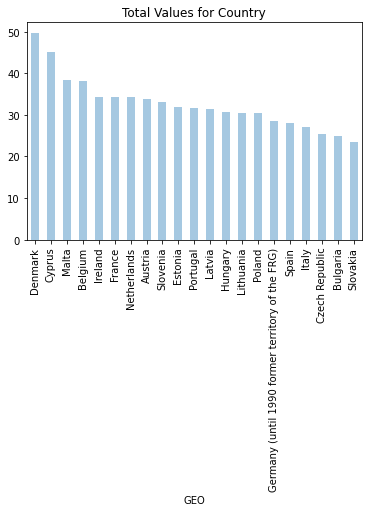

In [85]:
totalSum = pivedu. sum(axis = 1).sort_values(ascending = False)
totalSum. plot(kind = 'bar', style = 'b', alpha = 0.4,
title = "Total Values for Country")

Note that if we want the bars ordered from the highest to the lowest value, we need to sort the values in the ```Series``` first. The parameter kind used in the plot function defines which kind of graphic will be used. In our case, a bar graph. The parameter ```style``` refers to the style properties of the graphic, in our case, the color of bars is set to b (blue). 

The alpha channel can be modified adding a keyword parameter ```alpha``` with a percentage, producing a more translucent plot. Finally,
using the ```title``` keyword the name of the graphic can be set.

It is also possible to plot a ```DataFrame``` directly. In this case, each column is treated as a separated Series. For example, instead of printing the accumulated value over the years, we can plot the value for each year.


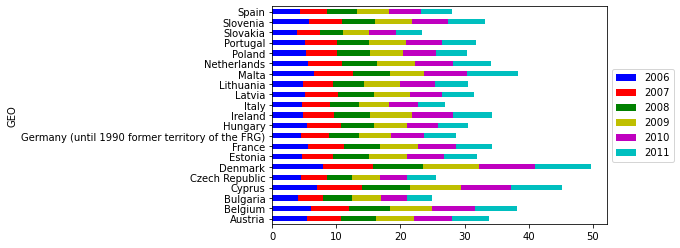

In [86]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu. plot(kind = 'barh', stacked = True , color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))

### Conclusions
This lesson has been a brief introduction to the most essential elements of a programming environment for data scientists. This is just a starting point for more advanced projects and techniques. As we will see in
the following chapters/modules, Python and its ecosystem is a very empowering choice for developing data science projects.



Reference: https://github.com/DataScienceUB/introduction-datascience-python-book
        